In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
#loading the dataset
ipl_df = pd.read_csv('C:\\Users\\Anand\\Desktop\\matches.csv')
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:


ipl_df.shape

(756, 18)

In [5]:
#looking at the info() and the shape, we can figure out that there are some NaN values in the dataset

## Data Cleaning and Processing

In [6]:

#as we can see that umpire3 is NaN in all the places, we can safely drop umpire1,umpire2 and umpire3 since
#we don't need those values in the visualization
ipl_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)

In [7]:

ipl_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [8]:
ipl_df.team1

0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
4      Royal Challengers Bangalore
                  ...             
751          Kolkata Knight Riders
752            Chennai Super Kings
753            Sunrisers Hyderabad
754                 Delhi Capitals
755                 Mumbai Indians
Name: team1, Length: 756, dtype: object

### looking at individual values from the dataset to find any inconsistensies

In [9]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
ipl_df.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [11]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [12]:
ipl_df.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [13]:

#### Errors in the data:
1. Pune has 3 team names mentioned in the dataset, replace with the correct one
2. Delhi Daredevils has been changed to Delhi Capitals
3. Bangalore has to be changed to Bengaluru

SyntaxError: invalid syntax (<ipython-input-13-f064d742aa98>, line 2)

In [14]:
#changing to the correct values
ipl_df.team1.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Pune Warriors':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals'}, inplace = True)
ipl_df.team2.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Pune Warriors':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals'},inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Pune Warriors':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals'},inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Pune Warriors':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals'},inplace=True)
ipl_df.city.replace({'Bangalore':'Bengaluru'},inplace=True)

In [15]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [16]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [17]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(4), object(11)
memory usage: 88.7+ KB


In [18]:
#checking for NaN values
ipl_df.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [19]:
#from the above data,we can see that we have null values in city,winner and player_of_match
null_values=ipl_df[ipl_df.isna().any(axis=1)]
null_values

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bengaluru,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


In [20]:
#setting NaN values with some values, city[NaN]='Dubai' since the stadium is located in Dubai
ipl_df.loc[[461,462,466,468,469,474,476],'city']='Dubai'

In [21]:
#checking to see if the data has uploaded at the specific indexes
ipl_df.loc[461:478]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,IPL-2014,Dubai,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,Dubai,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
463,464,IPL-2014,Sharjah,20-04-2014,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium
464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium
465,466,IPL-2014,Sharjah,22-04-2014,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium
466,467,IPL-2014,Dubai,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
467,468,IPL-2014,Sharjah,24-04-2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium
468,469,IPL-2014,Dubai,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,Dubai,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
470,471,IPL-2014,Abu Dhabi,26-04-2014,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium


In [22]:
ipl_df.city.isnull().sum()

0

## Explatory Data Analysis and Visualization

#### Number of matches played in each city

In [23]:
#to find out the number of matches played in each city, we have to count while grouping the entire data based on city 
#in asc order

In [24]:
print('Total number of matches played:',ipl_df.id.count())

Total number of matches played: 756


In [25]:
cities=ipl_df.groupby('city')[['id']].count()
cities

,id
city,
Abu Dhabi,7
Ahmedabad,12
Bengaluru,80
Bloemfontein,2
Cape Town,7
Centurion,12
Chandigarh,46
Chennai,57
Cuttack,7


In [26]:
cities.rename(columns={'id':'matches'},inplace=True)
cities=cities.sort_values('matches',ascending=True).reset_index()
cities

,city,matches
0,Bloemfontein,2
1,Nagpur,3
2,Kimberley,3
3,East London,3
4,Kanpur,4
5,Kochi,5
6,Raipur,6
7,Sharjah,6
8,Abu Dhabi,7
9,Ranchi,7


<AxesSubplot:title={'center':'Number of matches in each city - StripPlot'}, xlabel='matches', ylabel='city'>

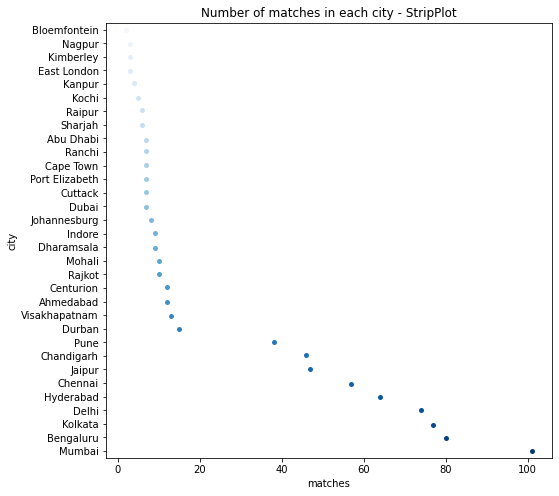

In [27]:
#strip plot
plt.figure(figsize=(8,8))
plt.title('Number of matches in each city - StripPlot')
sns.set_context('paper',font_scale=1.4)
sns.stripplot(x='matches',y='city',data=cities,palette='Blues')

<AxesSubplot:title={'center':'Number of matches in each city'}, xlabel='matches', ylabel='city'>

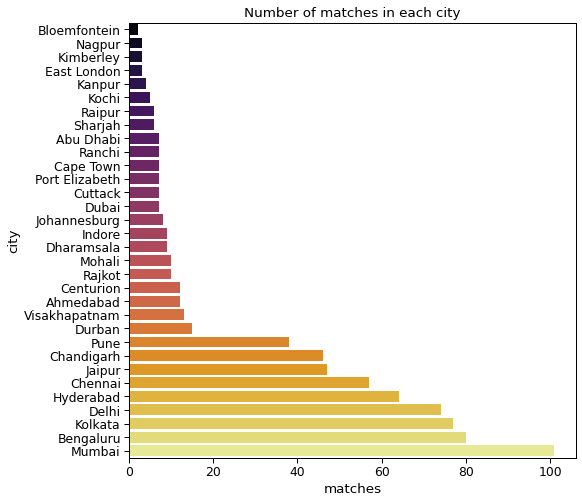

In [28]:
#bar plot
plt.figure(figsize=(8,8))
plt.title('Number of matches in each city')
sns.barplot(x='matches',y='city',data=cities,palette='inferno')

### Which team has won the most number of matches

In [29]:
ipl_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan], dtype=object)

In [30]:
winner=ipl_df.groupby('winner')[['id']].count()
winner=winner.sort_values('id',ascending=False).reset_index()
winner.rename(columns = {'id':'wins','winner':'Teams'},inplace=True)
winner

,Teams,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


<AxesSubplot:xlabel='wins', ylabel='Teams'>

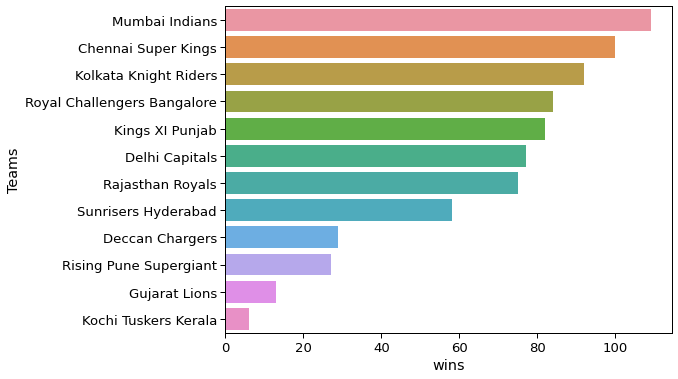

In [31]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.5)
sns.barplot(x='wins',y='Teams',data=winner)

### number of matches played each season

In [32]:
season=ipl_df.Season.unique()
print("total number of seasons:",np.count_nonzero(season))
ipl_df['Season']=ipl_df['Season'].str.split('-').str.get(1)

total number of seasons: 12


In [33]:
season_df=ipl_df.groupby('Season')[['id']].count()
season_df=season_df.sort_values('id').reset_index()
season_df.rename(columns = {'id':'matches','Season':'IPL'},inplace=True)
season_df

,IPL,matches
0,2009,57
1,2008,58
2,2015,59
3,2017,59
4,2010,60
5,2014,60
6,2016,60
7,2018,60
8,2019,60
9,2011,73


<AxesSubplot:title={'center':'Matches played each season'}, xlabel='IPL', ylabel='matches'>

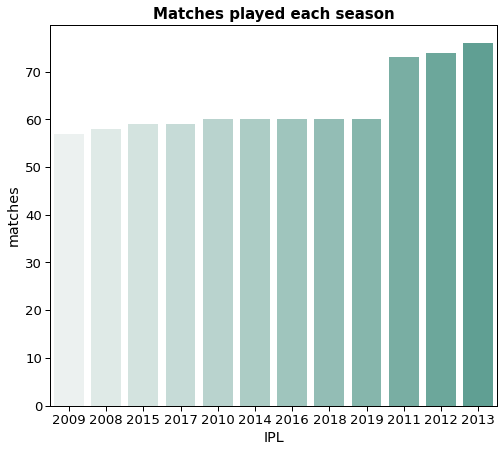

In [34]:
plt.figure(figsize=(8,7))
plt.title('Matches played each season',fontweight='bold',fontsize=15)
sns.set_context('paper',font_scale=1.5)
sns.barplot(x='IPL',y='matches',data=season_df,palette='light:#5A9')

### Most used venues(Favourite venues)

In [35]:
v=ipl_df.venue.unique()
print('total number of unique venues:',np.count_nonzero(v))

total number of unique venues: 41


#### Barplot

Text(0.5, 1.0, 'Most played at grounds')

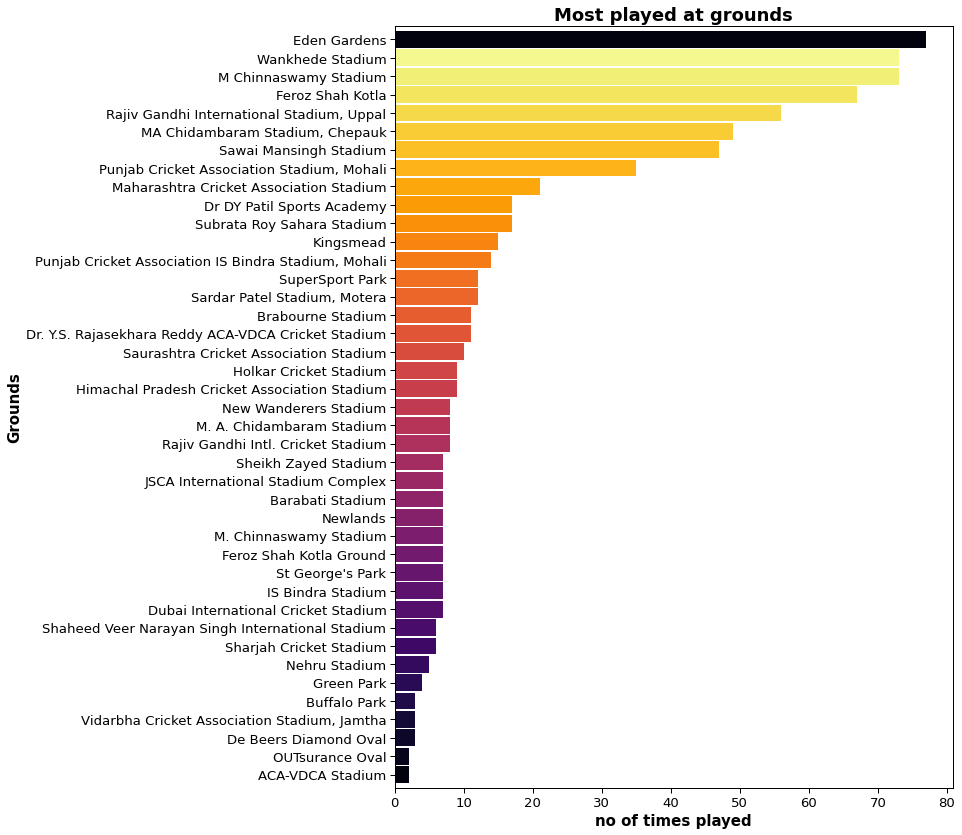

In [36]:
#another method of grouping the data and counting the value
plt.figure(figsize=(10,14))
venue_df1=ipl_df['venue'].value_counts().sort_values(ascending=True).plot.barh(width=0.91,color=sns.color_palette('inferno',40))
plt.xlabel('no of times played',fontweight='bold',fontsize=15)
plt.ylabel('Grounds',fontweight='bold',fontsize=15)
plt.title('Most played at grounds',fontweight='bold',fontsize=18)

#### strip plot

<AxesSubplot:xlabel='played', ylabel='Grounds'>

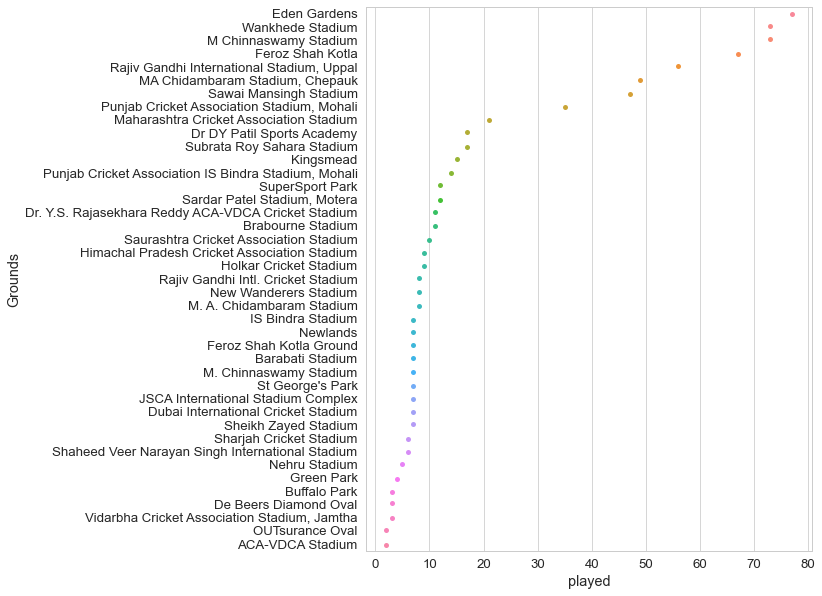

In [37]:
venue_df=ipl_df.groupby('venue')[['id']].count()
venue_df=venue_df.sort_values('id',ascending=False).reset_index()
venue_df.rename(columns = {'id':'played','venue':'Grounds'},inplace=True)
sns.set_style('whitegrid')
plt.figure(figsize=(8,10))
sns.stripplot(x='played',y='Grounds',data=venue_df)

#### pie graph

In [38]:
venue_df=venue_df[:10]
labels = list(venue_df.Stadium)
plt.figure(figsize=(9,8))
plt.title('Top 10 Most Played at Grounds/Stadiums',fontweight='bold',fontsize=20)
plt.pie(venue_df.Total,labels=labels,textprops={'fontsize': 12});

AttributeError: 'DataFrame' object has no attribute 'Stadium'

### most player of the matches across all seasons

In [ ]:
man_of_match=ipl_df.groupby('player_of_match')[['id']].count()
man_of_match=man_of_match.sort_values('id',ascending=False).reset_index()
man_of_match=man_of_match.rename(columns={'id':'total wins','player_of_match':'man_of_match'})
man_of_match=man_of_match.head(10)
man_of_match

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.set_context('paper',font_scale=1.5)
sns.barplot(x='man_of_match',y='total wins',data=man_of_match,palette='inferno')

### After winning the toss,to bat or to field?

In [ ]:
ipl_df.toss_winner.unique()

In [42]:
ipl_df.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [43]:
toss_df=ipl_df['toss_decision'].value_counts()
toss_df

field    463
bat      293
Name: toss_decision, dtype: int64

In [44]:
decision_df = ipl_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()
decision_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
decision_df

,Decision,Total
0,bat,293
1,field,463


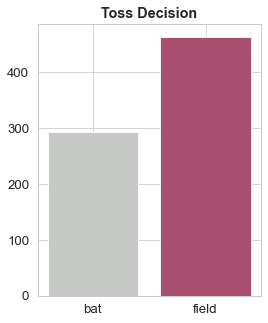

In [45]:
plt.figure(figsize=(4,5))
sns.set_style('whitegrid')
plt.title('Toss Decision',fontweight='bold')
plt.bar(decision_df.Decision, decision_df.Total, color=['#c7c9c7','#A95070']);
#sns.barplot(x='Decision',y='Total',data=decision_df,colors=['#FAE6FC','#A95070'])

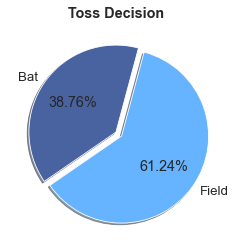

In [46]:
decision=ipl_df[(ipl_df['toss_decision']=='bat')]
labels=['Bat','Field']
partition=[len(decision),756-len(decision)] #756 is the total number of matches played
plt.title('Toss Decision',fontweight='bold')
plt.pie(partition,labels=labels,startangle=75,shadow=1,explode=(0.0,0.08),autopct='%1.2f%%',colors=['#4863A0','#66b3ff'])
plt.show()

### Which decision is the winning decision(bat/field)

In [47]:
field_df=ipl_df.loc[(ipl_df['toss_winner']==ipl_df['winner']) & (ipl_df['toss_decision']=='field'),['id','winner','toss_decision']]
field_df

,id,winner,toss_decision
1,2,Rising Pune Supergiant,field
2,3,Kolkata Knight Riders,field
3,4,Kings XI Punjab,field
5,6,Sunrisers Hyderabad,field
6,7,Mumbai Indians,field
...,...,...,...
749,11345,Royal Challengers Bangalore,field
750,11346,Kings XI Punjab,field
751,11347,Mumbai Indians,field
753,11413,Delhi Capitals,field


In [48]:
bat_df=ipl_df.loc[(ipl_df['toss_winner']==ipl_df['winner']) & (ipl_df['toss_decision']=='bat'),('id','winner','toss_decision')]
bat_df

,id,winner,toss_decision
4,5,Royal Challengers Bangalore,bat
14,15,Delhi Capitals,bat
20,21,Sunrisers Hyderabad,bat
50,51,Delhi Capitals,bat
54,55,Royal Challengers Bangalore,bat
...,...,...,...
713,11309,Chennai Super Kings,bat
729,11325,Mumbai Indians,bat
741,11337,Delhi Capitals,bat
746,11342,Mumbai Indians,bat


In [49]:
#Now concatenate both the dataframes
cat=[bat_df,field_df]
result_df=pd.concat(cat)
result_df=result_df.groupby('toss_decision')[['id']].count()
result_df

,id
toss_decision,
bat,134
field,259


In [50]:
result_df=result_df.sort_values('id',ascending=True).reset_index()
result_df=result_df.rename(columns={'id':'Total','toss_decision':'Decision'})
result_df

,Decision,Total
0,bat,134
1,field,259


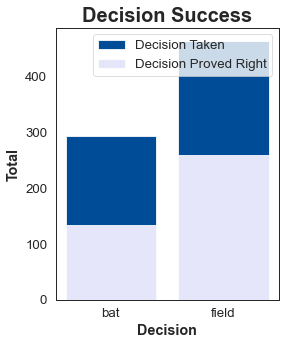

In [51]:
#out of total 756 tosses through 2008-2019, 463 times the team decided to field and 293 times the team decided to bat
#we have to make comparisions between the two
plt.figure(figsize=(4,5))
sns.set_style('white')
plt.title("Decision Success",fontweight='bold',fontsize=20)
plt.xlabel('Decision',fontweight='bold')
plt.ylabel('Total',fontweight='bold')
#sns.barplot(x='Decision',y='Total',data=decision_df,palette='Blues')
#sns.barplot(x='Decision',y='Total',data=result_df,palette='inferno')
plt.bar(decision_df.Decision, decision_df.Total, color=['#004c97','#004c97']);
plt.bar(result_df.Decision, result_df.Total, color=['#e6e6fa','#e6e6fa']);
plt.legend(['Decision Taken','Decision Proved Right']);

### is toss winner also the match winner?

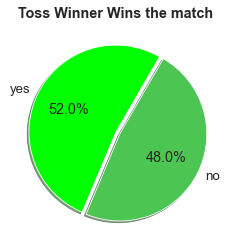

In [52]:
match_winner_df=ipl_df[ipl_df['toss_winner']==ipl_df['winner']]
partition=[len(match_winner_df),(756-len(match_winner_df))]
labels=['yes','no']
plt.title('Toss Winner Wins the match',fontweight='bold')
plt.pie(partition,labels=labels,startangle=60,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['#00FF00','#4CC552'])
plt.show()

### who won the most IPL trophies?

In [53]:
#to find this we need to select the final matches in each year
final_df=ipl_df.groupby('Season').tail(1)
final_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
58,59,2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"
116,117,2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium


In [54]:
final_df=final_df.sort_values('Season')
final_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
116,117,2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
58,59,2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [55]:
final_df.winner.unique()

array(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad'],
      dtype=object)

In [56]:
final_df['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

<AxesSubplot:title={'center':'Season Wins'}, xlabel='winner', ylabel='count'>

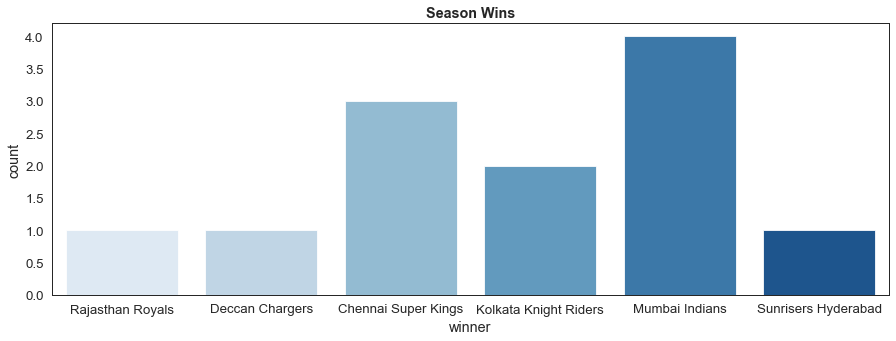

In [57]:
#as we can see, Mumbai Indians won the most IPL finales till 2019
plt.figure(figsize=(15,5))
plt.title('Season Wins',fontweight='bold')
sns.countplot(x=final_df['winner'],data=final_df,palette='Blues')

### Does winning toss equals winning finals?

In [58]:
final_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
116,117,2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
58,59,2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


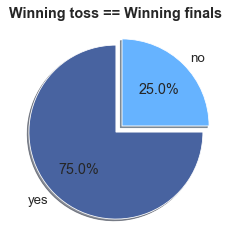

In [59]:
result=final_df[final_df['toss_winner']==final_df['winner']]
partition=[len(result),12-len(result)]
labels=['yes','no']
plt.title('Winning toss == Winning finals',fontweight='bold')
plt.pie(partition,labels=labels,startangle=90,shadow=True,colors=['#4863A0','#66b3ff'],explode=(0.0,0.1),autopct='%1.1f%%')
plt.show()